
Total count for output 10 are: {'00': 335, '01': 401, '10': 2595, '11': 669}

Total count for output 10 are: {'00': 430, '01': 429, '10': 2730, '11': 411}

Total count for output 00 are: {'00': 3251, '01': 175, '10': 433, '11': 141}

Total count for 00 and 11 are: {'00': 3205, '01': 271, '10': 302, '11': 222}


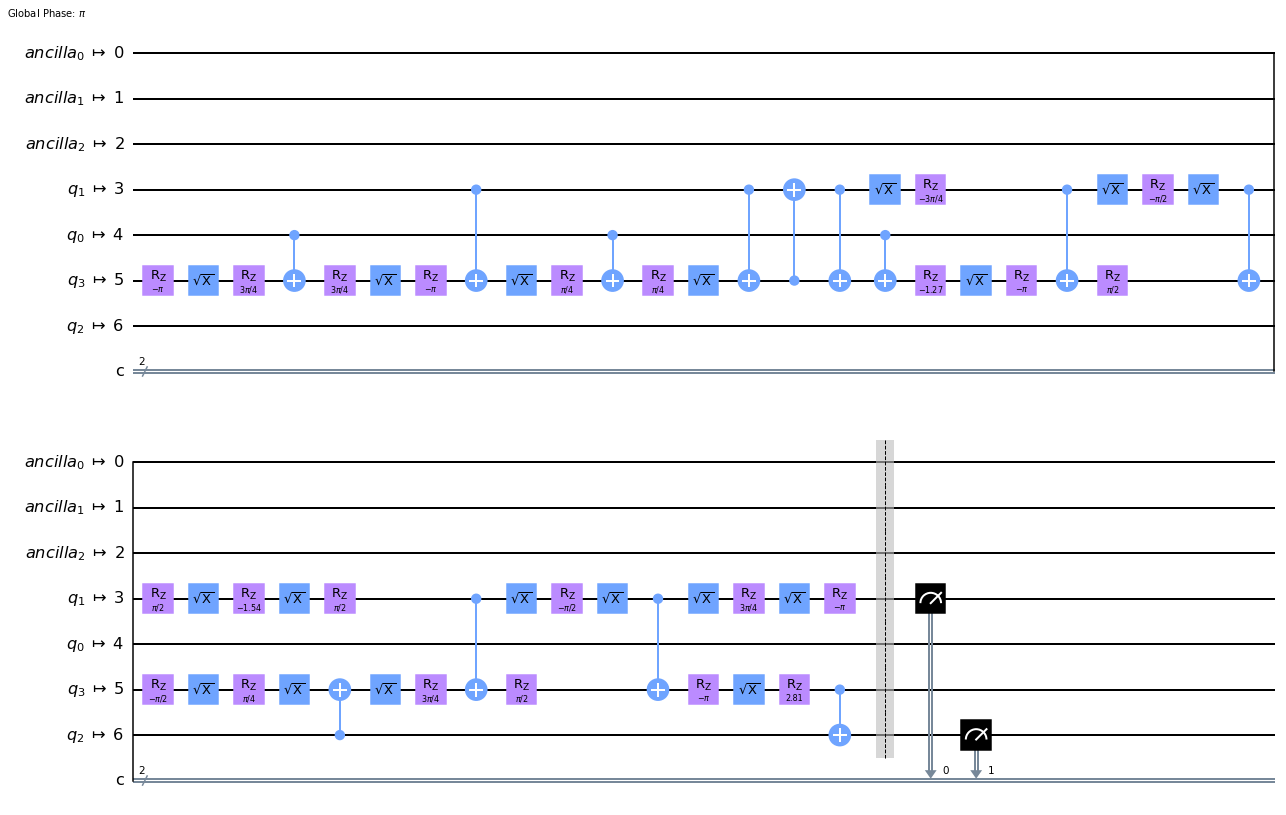

In [31]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import *
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

# Loading your IBM Quantum account(s)
provider = IBMQ.get_provider(hub ='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')
backend = provider.get_backend('ibm_perth')

# normal_fulladder which has input 0001
qc = QuantumCircuit(4,2)
qc.x(0)
qc.ccx(0, 1, 3)
qc.cx(0, 1)
qc.ccx(1, 2, 3)
qc.cx(1, 2)
qc.measure([2, 3], [1, 0])
qc.draw(output='mpl')

job = execute(qc, backend)
result = job.result()
counts_qc = result.get_counts(qc)
print("\nTotal count for output 10 are:",counts_qc)


# transpiled normal_fulladder
qc_transpile = transpile(qc, backend)
qc_transpile.draw(output='mpl')

job = execute(qc_transpile, backend, optimization_level = 3)
result = job.result()
counts_qctr = result.get_counts(qc_transpile)
print("\nTotal count for output 10 are:",counts_qctr)


#ccx in full_adder is replaced into ch-cz-ch gates
our_qc = QuantumCircuit(4,2)
our_qc.ch(0, 3)
our_qc.cz(1, 3)
our_qc.ch(0, 3)
our_qc.cx(0, 1)
our_qc.ch(1, 3)
our_qc.cz(2, 3)
our_qc.ch(1, 3)
our_qc.cx(1, 2)
our_qc.measure([2, 3], [1, 0])
our_qc.draw(output='mpl')

job = execute(our_qc, backend)
result = job.result()
counts_our_qc = result.get_counts(our_qc)
print("\nTotal count for output 00 are:",counts_our_qc)

# transpiled full_adder which has ch-cz-ch
our_qc_transpile = transpile(our_qc, backend, optimization_level = 3)
our_qc_transpile.draw(output='mpl')

job = execute(our_qc_transpile, backend)
result = job.result()
counts_our_qctr = result.get_counts(our_qc_transpile)
print("\nTotal count for 00 and 11 are:",counts_our_qctr)
our_qc_transpile.draw(output='mpl')